In [1]:
# importing neccesary libraries

In [2]:
import random
random.seed(123)

In [3]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

**Data loading and preprocessing**

In [4]:
# loads the data
file= pd.ExcelFile('data/real_estate_valuation.xlsx')
file.sheet_names

['data', 'description']

In [5]:
data= file.parse('data')
df= data.copy()

**Data quality and feature engineering**

In [6]:
print("Number of columns: ",df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns:  8
Number of rows:  414


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [10]:
df.iloc[:, 1:].describe().round(2) # summary statistics

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.00,414.00,414.00,414.00,414.00,414.00,414.00
mean,2013.15,17.71,1083.89,4.09,24.97,121.53,37.98
std,0.28,11.39,1262.11,2.95,0.01,0.02,13.61
min,2012.67,0.00,23.38,0.00,24.93,121.47,7.60
25%,2012.92,9.02,289.32,1.00,24.96,121.53,27.70
50%,2013.17,16.10,492.23,4.00,24.97,121.54,38.45
75%,2013.42,28.15,1454.28,6.00,24.98,121.54,46.60
max,2013.58,43.80,6488.02,10.00,25.01,121.57,117.50


In [11]:
# checking for missing values
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [12]:
columns = ['No.','transaction date', 'house age', 'dist to nearest MRT', 'number of convenience stores',
          'latitude', 'longitude', 'house price of unit area']
df.columns = columns

In [13]:
df['transaction date'] = np.round(df['transaction date'], 3)

In [14]:
# change the decimal years to standard years...

from datetime import datetime, timedelta
def convert(number):
    
    year= int(number)
    d = timedelta(days= (number - year)*365)
    day1 = datetime(year, 1, 1)
    date = d+day1
    return date

df['date-time'] = [convert(i) for i in df['transaction date'] ]

In [15]:
# creates new variables of date components
df['transaction_year'] = df['date-time'].dt.strftime('%Y')
df['transaction_month'] = df['date-time'].dt.strftime('%B')
df['transaction_dayname'] = df['date-time'].dt.strftime('%A')

In [16]:
df.drop('transaction date', axis=1, inplace=True)

In [17]:
df.head()

,No.,house age,dist to nearest MRT,number of convenience stores,latitude,longitude,house price of unit area,date-time,transaction_year,transaction_month,transaction_dayname
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-30 16:55:11.999997,2012,November,Friday
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-30 16:55:11.999997,2012,November,Friday
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013-08-01 19:04:48.000003,2013,August,Thursday
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013-07-02 12:00:00.000000,2013,July,Tuesday
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-31 01:04:48.000003,2012,October,Wednesday


In [18]:
list(df)

['No.',
 'house age',
 'dist to nearest MRT',
 'number of convenience stores',
 'latitude',
 'longitude',
 'house price of unit area',
 'date-time',
 'transaction_year',
 'transaction_month',
 'transaction_dayname']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   No.                           414 non-null    int64         
 1   house age                     414 non-null    float64       
 2   dist to nearest MRT           414 non-null    float64       
 3   number of convenience stores  414 non-null    int64         
 4   latitude                      414 non-null    float64       
 5   longitude                     414 non-null    float64       
 6   house price of unit area      414 non-null    float64       
 7   date-time                     414 non-null    datetime64[ns]
 8   transaction_year              414 non-null    object        
 9   transaction_month             414 non-null    object        
 10  transaction_dayname           414 non-null    object        
dtypes: datetime64[ns](1), float64(5)

In [20]:
coord = df[['longitude', 'latitude', 'house price of unit area']]
coord.to_csv('data/co-ordinates.csv') 
# I saved the data 
# and made a plot in the Tableau Visualization softwore..

<font size= 5> HOUSE PRICES BY LOCATION </font><br>
<font color='red'>Visualization done using **Tableau**.</font>

<img src = 'images/house-prices-across the district.png'>
<br>

House prices is relatively proportional to the location of the house.<br>
The closer the house to **resource and infrastructures** the more costly the house is.

**Check for normality**

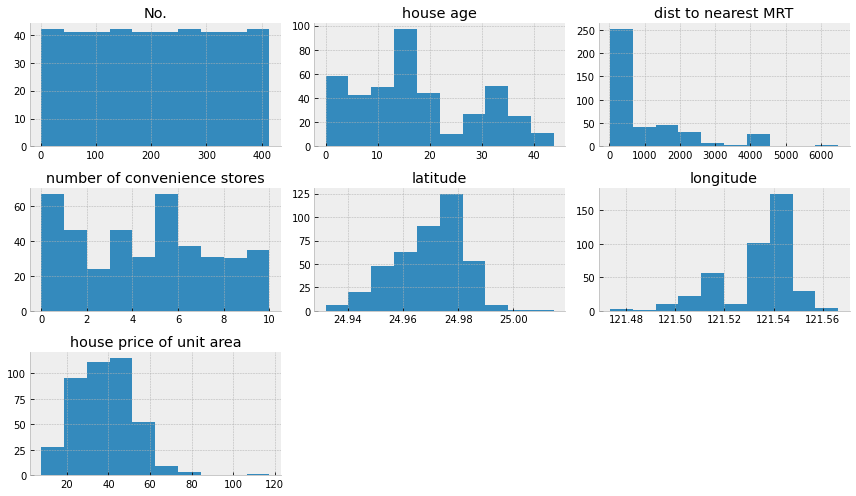

In [21]:
# makes histogram plots of each numeric columns
df.select_dtypes('number').hist(figsize = (12, 7),density=False );
plt.tight_layout()
sns.despine()

**check for outliers and extreme values**

In [22]:
numeric_columns= list(df.select_dtypes('number').iloc[:, [0,1,2,5]])
numeric_columns

['No.', 'house age', 'dist to nearest MRT', 'longitude']

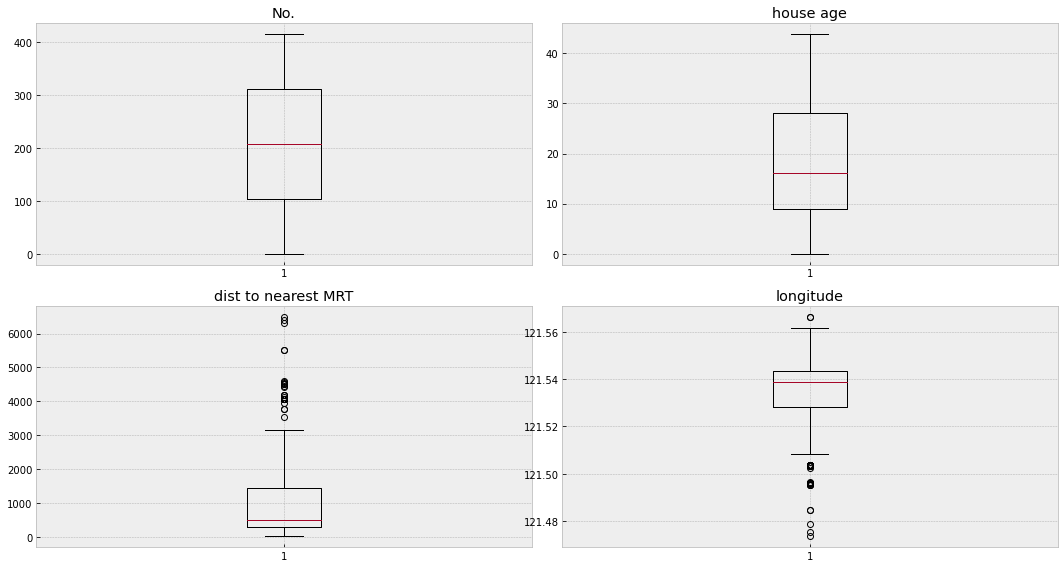

In [23]:
# making boxplot to check for outliers in the data
plt.figure(figsize=(15, 8))
for index, col in enumerate(numeric_columns):
    plt.subplot(2,2,index+1)
    plt.tight_layout()
    plt.boxplot(df[col])
    plt.title(col)

We can see that **dist to nearest MRT** is highly skewed with couple of outliers, the same goes to **house price per unit area.**<br>
The outlier problem is solved by normalizing the data.

**check for correlations**

Text(0.5, 1.0, 'Correlation between variables')

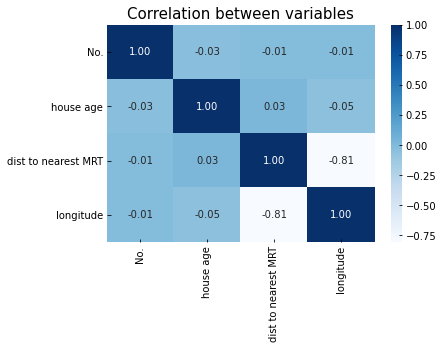

In [24]:
sns.heatmap(data=df[numeric_columns].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation between variables', size=15)

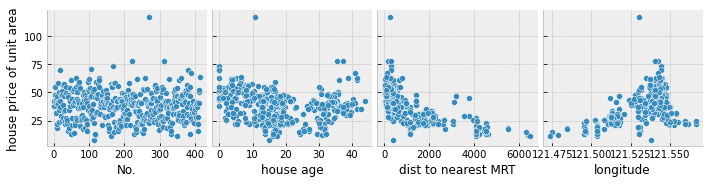

In [25]:
sns.pairplot(df, y_vars= ['house price of unit area'], x_vars= numeric_columns)

- **Model Building step**

In [26]:
# all necessary packages to aid in the model building processes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error # root mean square error
from yellowbrick.model_selection import LearningCurve

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [27]:
df.head()

,No.,house age,dist to nearest MRT,number of convenience stores,latitude,longitude,house price of unit area,date-time,transaction_year,transaction_month,transaction_dayname
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-30 16:55:11.999997,2012,November,Friday
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-30 16:55:11.999997,2012,November,Friday
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013-08-01 19:04:48.000003,2013,August,Thursday
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013-07-02 12:00:00.000000,2013,July,Tuesday
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-31 01:04:48.000003,2012,October,Wednesday


In [28]:
df.drop(['date-time'], axis=1, inplace=True)

In [29]:
list(df)

['No.',
 'house age',
 'dist to nearest MRT',
 'number of convenience stores',
 'latitude',
 'longitude',
 'house price of unit area',
 'transaction_year',
 'transaction_month',
 'transaction_dayname']

**Data Splitting**

In [30]:
cat = ['transaction_month', 'transaction_dayname', 'number of convenience stores']
num = ['transaction_year', 'house age', 'dist to nearest MRT', 'latitude', 'longitude']

ohe = OneHotEncoder()
sc = StandardScaler()
col_trans = ColumnTransformer([('encoder', ohe, cat), 
                               ('scaler',sc, num)])

cols = ['house age',
 'dist to nearest MRT',
 'number of convenience stores',
 'latitude',
 'longitude',
 'transaction_year',
 'transaction_month',
 'transaction_dayname']

X, y = df[cols], df['house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size=.3)

In [31]:
# various algorithms

lm= LinearRegression()

rfr = RandomForestRegressor(max_depth=50, max_features=12, max_samples=4)

lassr = Lasso()

dtr= DecisionTreeRegressor(max_features=20, max_depth=100)

svr = SVR()

ridge = Ridge()

**Model Fitting**

In [32]:
# A code to print out various scores for each model..
models= [lm, rfr, dtr, svr, lassr, ridge]
names = ['linear regression', 'random forest', 'decision tree', 'svm', 'lasso', 'ridge']

reports = []
predictions = []
modelsPipe = []

for pipe, name in zip(models, names):
    pipe = Pipeline(steps=[('column_transformer', col_trans), ('classifier', pipe)])
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    
    report= pd.Series({'R2-score ':r2, 
                      'Mean Square Error': mse, 
                      'Mean Absolute Error': mae, 
                      'Root Mean Square Error': rmse}, name= name.upper())
    
    reports.append(report,)
    predictions.append(y_pred)
    modelsPipe.append(pipe)

REPORT = []
for i in np.arange(0, 6):
    r = reports[i]
    REPORT.append(r)

In [33]:
pd.DataFrame(REPORT).T

,LINEAR REGRESSION,RANDOM FOREST,DECISION TREE,SVM,LASSO,RIDGE
R2-score,0.512296,0.254640,0.712426,0.511342,0.472966,0.519326
Mean Square Error,82.923955,126.733062,48.896080,83.086138,89.611297,81.728743
Mean Absolute Error,6.485577,8.582640,5.239200,6.466826,6.927467,6.438575
Root Mean Square Error,9.106259,11.257578,6.992573,9.115160,9.466324,9.040395


R2 score of all the models are around .5 except **Lasso and Random Forest** (which means they are unable to explain most of the data), 

This may improve ones we deal with the outliers in the data and or add more data.
But removing those extreme values comes with penalty because they are not really anomalies they are just higher than average.
The best thing to do is to build two models (one model build with that extreme values in the data and the other model build without the extreme values).

**Predictions of each model**

In [34]:
# A code to compare the predictions of each model..
dictionary = {}
names = ['linear regression', 'random forest', 'decision tree', 'svm', 'lasso', 'ridge']

for name, i in zip(names, np.arange(0, 7)):
    preds = predictions[i]
    dictionary[name] = preds   
    
pd.DataFrame(dictionary, index= y_test).head(10)

,linear regression,random forest,decision tree,svm,lasso,ridge
house price of unit area,,,,,,
23.7,27.848650,32.889,22.1,28.861791,33.646133,28.364470
37.9,45.072833,37.334,45.1,43.213472,45.628605,45.181397
46.6,33.180366,33.764,41.2,32.467101,34.689378,33.261935
29.3,44.480295,36.319,37.3,41.751019,44.108779,44.329897
26.2,27.813827,32.590,30.1,31.913263,33.589687,28.053871
37.4,41.292690,40.041,37.5,37.898711,37.378192,41.183307
52.2,51.992383,38.692,43.5,43.400210,45.963854,51.823607
63.2,52.248182,38.782,53.7,45.720326,45.396501,52.078169
25.7,21.973779,31.490,23.2,24.705841,27.677554,22.178397


- **model evaluation**

In [35]:
k = KFold(n_splits=20)

In [36]:
# a code to visualize the scores of the model
model_name = ['linear regression', 'random forest', 'decision tree', 'SVR', 'lasso', 'ridge']
mae_= []
r2_= []

for model in modelsPipe:
        mae= cross_val_score(model, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')
        mae_.append(mae)
        
        r2= cross_val_score(model, X_train, y_train, cv=k, scoring='r2')
        r2_.append(r2)   
        
cv_scores_mae = pd.DataFrame(mae_, index=model_name).T
cv_scores_r2 = pd.DataFrame(r2_, index=model_name).T

<AxesSubplot:title={'center':'negative MAE'}>

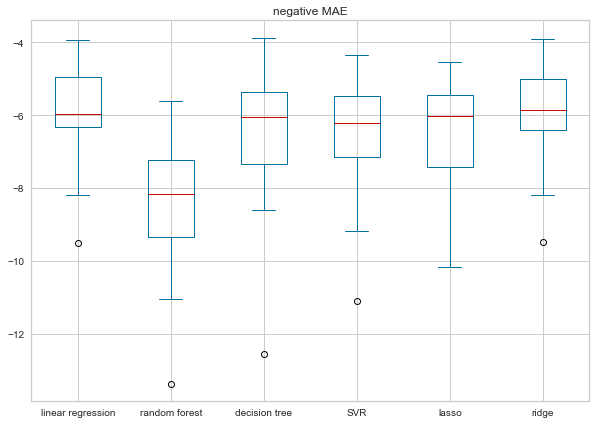

In [37]:
cv_scores_mae.plot(kind= 'box', figsize=(10, 7), title='negative MAE')

<AxesSubplot:title={'center':'R-Square'}>

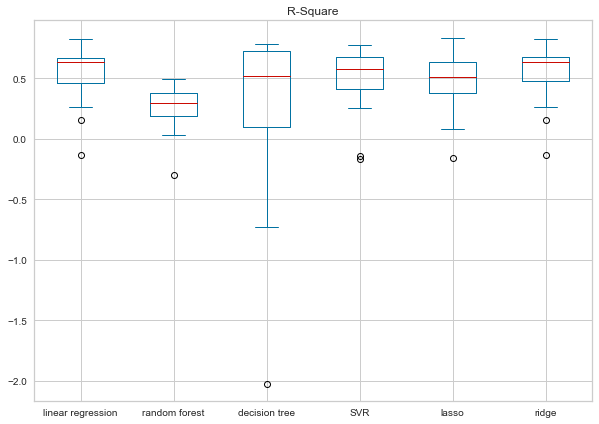

In [38]:
cv_scores_r2.plot(kind='box', figsize=(10, 7), title='R-Square')

**Best models**
* **Ridge:** Does well on the training set but performs poorly on the test set.
* SVR
* Linear Regression
* **Lasso:** Does well on the training set but performs poorly on the test set.
* **Decision Tree regressor:** Does well on both the training and the testing set.

**Checklist**
* Variance
* Mean
* Inter-quartile ranges

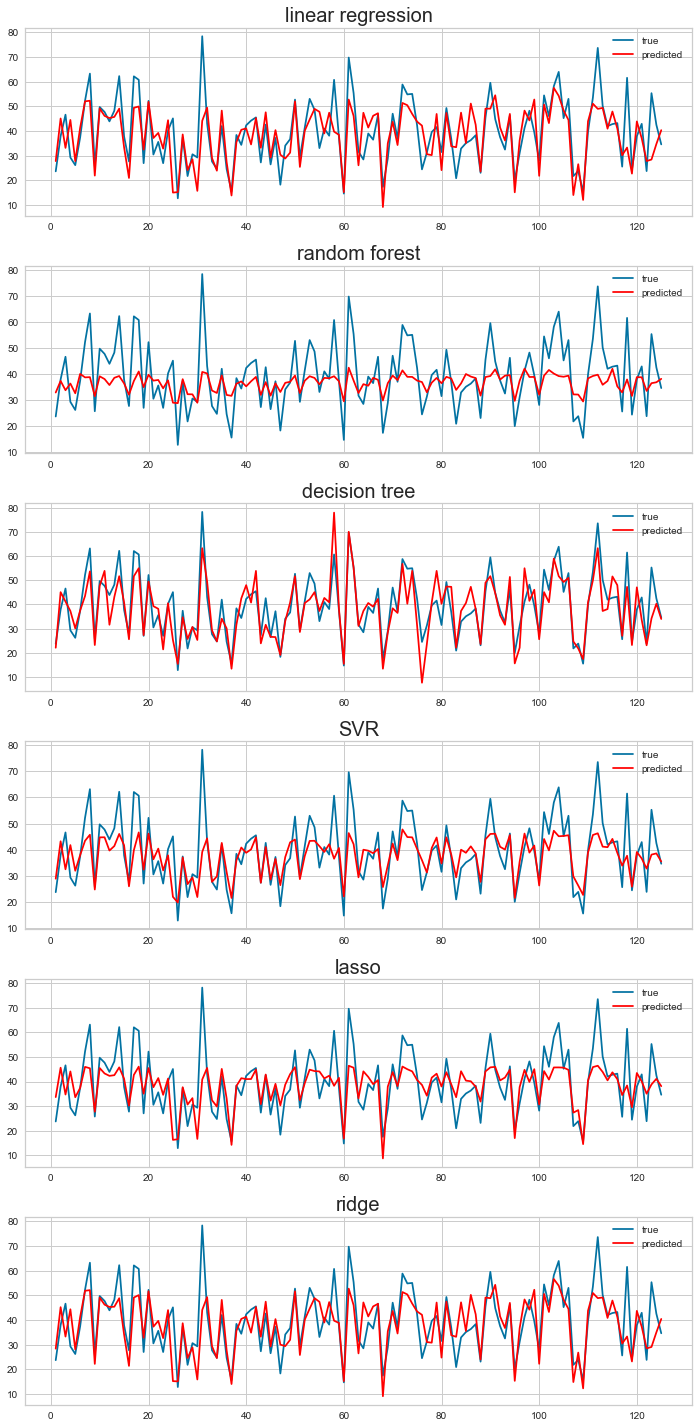

In [39]:
# a loop to compare how each model perdorm on the test set before **tuning**
plt.figure(figsize= (10, 20))
for pred, names in zip(enumerate(predictions), model_name):
    plt.subplot(6, 1, pred[0]+1)
    plt.tight_layout()
    plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
    plt.plot(range(1, len(X_test)+1), pred[1], color ='red', label= 'predicted')
    plt.title(str(names), size=  20)
    plt.legend()

* **fine tuning**

In [40]:
# we re-train decision tree regressor and  (using gridsearch)

ridge_pipe = Pipeline(steps=[('transformer', col_trans), ('reg', Ridge())])
param_grid = {
    'reg__alpha': [1, 0.5, 0.05,0.005, 0.0005, 0.00005],
    'reg__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}
search0 = GridSearchCV(ridge_pipe, param_grid, n_jobs=-1)
search0.fit(X_train, y_train);

In [41]:
lasso_pipe = Pipeline(steps=[('transformer', col_trans), ('reg', Lasso())])
param_grid = {
    'reg__alpha': [1, 0.5, 0.05,0.005, 0.0005, 0.00005],
    'reg__tol': [0.1, 0.001, 0.0001, 0.00001],
}
search1 = GridSearchCV(lasso_pipe, param_grid, n_jobs=-1)
search1.fit(X_train, y_train);

In [42]:
decision_pipe = Pipeline(steps=[('transformer', col_trans), ('reg', DecisionTreeRegressor())])
param_grid = {
    'reg__max_depth': [4, 10, 20, 60, 85],
    'reg__max_features': [2, 4, 7, 9, 11, 15],
    'reg__max_leaf_nodes':[5, 15, 20, 30, 50]
}
search2 = GridSearchCV(decision_pipe, param_grid, n_jobs=-1)
search2.fit(X_train, y_train);

In [ ]:
search0.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['transaction_month',
                                                   'transaction_dayname',
                                                   'number of convenience '
                                                   'stores']),
                                                 ('scaler', StandardScaler(),
                                                  ['transaction_year',
                                                   'house age',
                                                   'dist to nearest MRT',
                                                   'latitude',
                                                   'longitude'])])),
                ('reg', Ridge(alpha=1, solver='sparse_cg'))])

In [ ]:
search1.best_estimator_

In [ ]:
search2.best_estimator_

In [ ]:
search_pred0 = search0.predict(X_test)
search_pred1 = search1.predict(X_test)
search_pred2 = search2.predict(X_test)

In [ ]:
# a loop to compare how each model perdorm on the test set after **tuning**
plt.figure(figsize=(15, 10))
plt.subplot(3, 1,1)
plt.title('Ridge Regressor Prediction (After Grid Search)')
plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
plt.plot(range(1, len(X_test)+1), search_pred0, color ='red', label= 'predicted')
plt.legend()

plt.subplot(3, 1,2)
plt.title('Lasso Regressor Prediction (After Grid Search)')
plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
plt.plot(range(1, len(X_test)+1), search_pred1, color ='red', label= 'predicted')
plt.legend()

plt.subplot(3, 1,3)
plt.title('Decision Tree Regressor Prediction (After Grid Search)')
plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
plt.plot(range(1, len(X_test)+1), search_pred2, color ='red', label= 'predicted')
plt.legend()

- **my final thought**

From the output about;<br>
**Ridge and Lasso seems** to be performing best all the time by running couple of iterations over-time.
But it turns out they have poor generalization capability (High tendency to overfit) as compared to Decision Tree Regressor.

So I used the **decision tree regressor** to build the web application.

**Below is a screenshot of the web application I built, which runs on the decision tree model.**
<img src= 'images/Capture.png'>

In [ ]:
# saving the best models.

from joblib import dump, load

dump(search0, 'output/model.pkl')
dump(search1, 'output/model2.pkl')
dump(search2, 'output/model3.pkl')